In [1]:
import numpy as np
from matplotlib import pyplot as plt
import datetime

In [10]:
date = []
time = []
distance = []
B_field = []
proton = []

In [11]:
'''
Proton flux (4.6-6.2 MeV) data obatained from Voyager-1 
It contains date, time, distance [AU], magnitude of magnetic field [nT], and proton flux [1/(cm^2 sec ster MeV)]
'''

file = 'VOYAGER1_COHO1HR_MERGED_MAG_PLASMA_132635.txt'
full_text = open(file, 'r')

n = 0
while True:
    line = full_text.readline()
    
    if not line:
        break
    
    if '#' not in line:
        n += 1
        columns = line.split()
        
        if n == 1: header = columns
        elif n == 2: units = columns
        else: 
            if (float(columns[3]) > -1e31) and (float(columns[4]) > -1e31): # exclude the missing data
                date.append(columns[0])
                time.append(columns[1])
                distance.append(float(columns[2]))
                B_field.append(float(columns[3]))
                proton.append(float(columns[4]))

In [12]:
dates = []
for i in range(len(date)):
    date_time = date[i] + ' ' + time[i][:-4]
    dates.append(datetime.datetime.strptime(date_time, '%d-%m-%Y %H:%M:%S')) 
    # convert string format to datetime format

In [13]:
distance = np.array(distance)
B_field = np.array(B_field)
proton = np.array(proton)

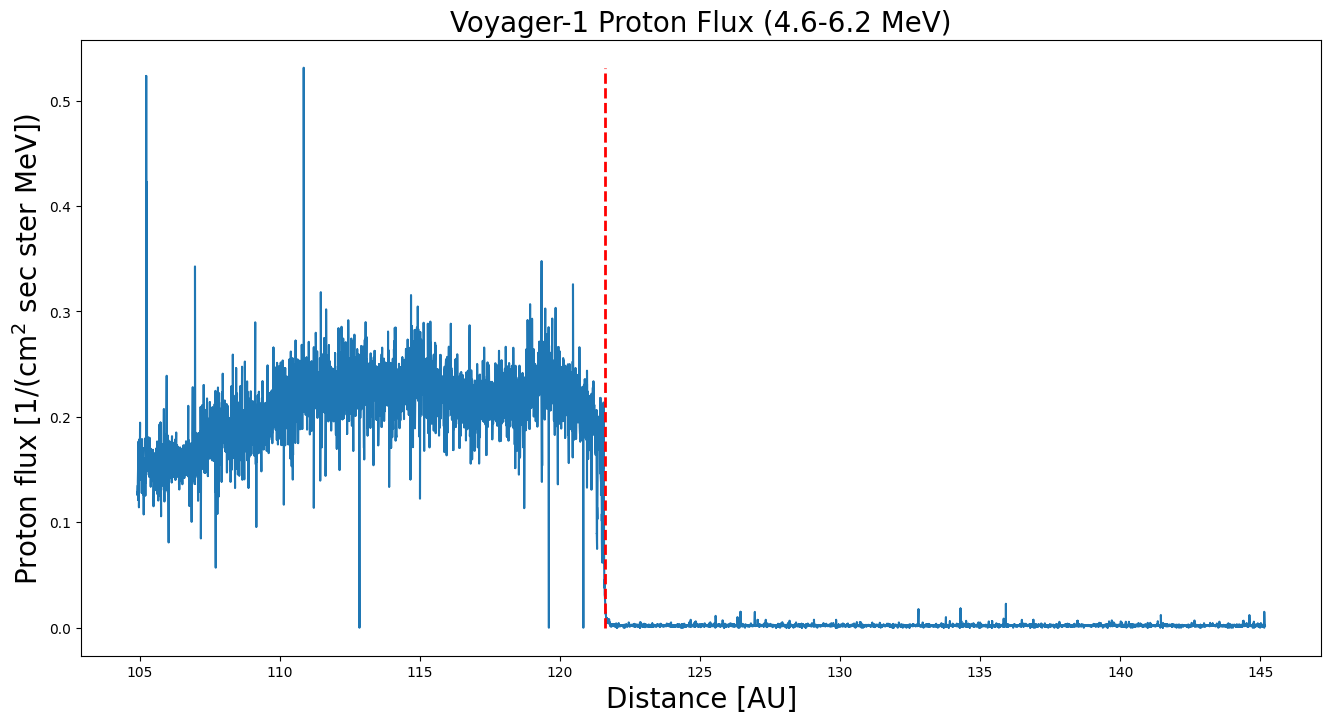

In [32]:
plt.figure(figsize=(16, 8))
plt.plot(distance, proton)
plt.title('Voyager-1 Proton Flux (4.6-6.2 MeV)', fontsize=20)
plt.xlabel('Distance [AU]', fontsize=20)
plt.ylabel('Proton flux [1/(cm$^2$ sec ster MeV])', fontsize=20)
plt.yticks(np.arange(min(proton), max(proton), 0.1))
plt.vlines(x=121.6, ymin=min(proton), ymax=max(proton), color='red', linewidth=2, linestyle='--')
plt.show()

# We can guess that the heliopause is far away about 121.6 AU from the graph.

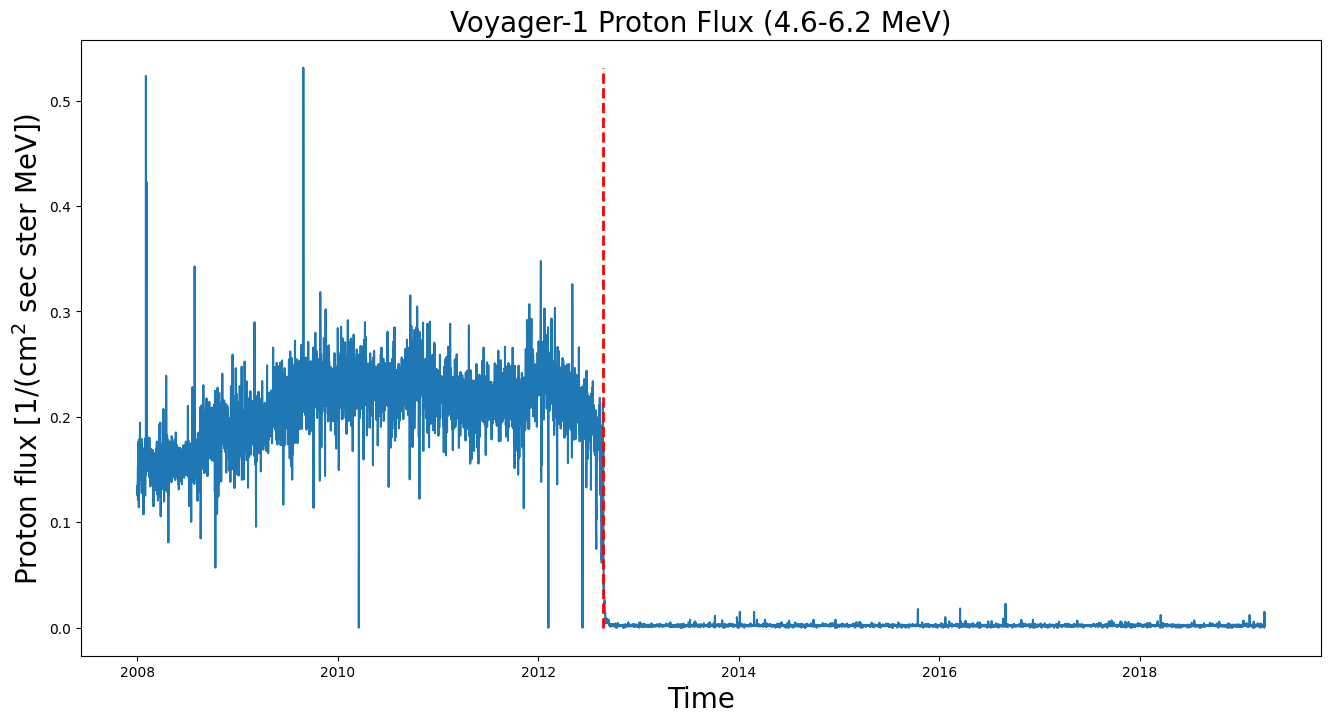

In [33]:
plt.figure(figsize=(16, 8))
plt.plot(dates, proton)
plt.title('Voyager-1 Proton Flux (4.6-6.2 MeV)', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Proton flux [1/(cm$^2$ sec ster MeV])', fontsize=20)
plt.yticks(np.arange(min(proton), max(proton), 0.1))
plt.vlines(x=datetime.datetime(2012, 8, 25), ymin=min(proton), ymax=max(proton), color='red', linewidth=2, linestyle='--')
plt.show()

# We can guess that Voyager-1 passed the heliopause at 2012/8/25 from the graph.